# KMeans & Hirarchical  Clustering 

### 1. Hirarchical Clustering

In [11]:
# improting libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.cluster.hierarchy as shc
import seaborn as sns


from sklearn.cluster import AgglomerativeClustering , KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

In [12]:
# reading a dataset
df = pd.read_csv('CC GENERAL.csv')
df.head(10)

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
5,C10006,1809.828751,1.000000,1333.28,0.00,1333.28,0.000000,0.666667,0.000000,0.583333,0.000000,0,8,1800.0,1400.057770,2407.246035,0.000000,12
6,C10007,627.260806,1.000000,7091.01,6402.63,688.38,0.000000,1.000000,1.000000,1.000000,0.000000,0,64,13500.0,6354.314328,198.065894,1.000000,12
7,C10008,1823.652743,1.000000,436.20,0.00,436.20,0.000000,1.000000,0.000000,1.000000,0.000000,0,12,2300.0,679.065082,532.033990,0.000000,12
8,C10009,1014.926473,1.000000,861.49,661.49,200.00,0.000000,0.333333,0.083333,0.250000,0.000000,0,5,7000.0,688.278568,311.963409,0.000000,12
9,C10010,152.225975,0.545455,1281.60,1281.60,0.00,0.000000,0.166667,0.166667,0.000000,0.000000,0,3,11000.0,1164.770591,100.302262,0.000000,12


In [13]:
df.shape

(8950, 18)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [15]:
df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


###  - Data preprocessing

In [16]:
def preprocessing(df):
    
    df.drop('CUST_ID',axis=1, inplace=True)
    df['CREDIT_LIMIT'].fillna(df['CREDIT_LIMIT'].mean(),inplace=True )
    df['MINIMUM_PAYMENTS'].fillna(df['MINIMUM_PAYMENTS'].median(), inplace=True)
    
    scaler= StandardScaler()
    
    cols=['BALANCE','PURCHASES','ONEOFF_PURCHASES',
                           'INSTALLMENTS_PURCHASES','CASH_ADVANCE','CREDIT_LIMIT','PAYMENTS','MINIMUM_PAYMENTS']
    for i in cols:
    
    
      df[[i]] = scaler.fit_transform(df[[i]])
    
         
    return df
    
    

In [17]:
df = preprocessing(df)

In [18]:
df

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,-0.731989,0.818182,-0.424900,-0.356934,-0.349079,-0.466786,0.166667,0.000000,0.083333,0.000000,0,2,-0.960433,-0.528979,-0.302400,0.000000,12
1,0.786961,0.909091,-0.469552,-0.356934,-0.454576,2.605605,0.000000,0.000000,0.000000,0.250000,4,0,0.688639,0.818642,0.097500,0.222222,12
2,0.447135,1.000000,-0.107668,0.108889,-0.454576,-0.466786,1.000000,1.000000,0.000000,0.000000,0,12,0.826062,-0.383805,-0.093293,0.000000,12
3,0.049099,0.636364,0.232058,0.546189,-0.454576,-0.368653,0.083333,0.083333,0.000000,0.083333,1,1,0.826062,-0.598688,-0.228307,0.000000,12
4,-0.358775,1.000000,-0.462063,-0.347294,-0.454576,-0.466786,0.083333,0.083333,0.000000,0.000000,0,1,-0.905464,-0.364368,-0.257266,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,-0.737950,1.000000,-0.333293,-0.356934,-0.132643,-0.466786,1.000000,0.000000,0.833333,0.000000,0,6,-0.960433,-0.486217,-0.341250,0.500000,6
8946,-0.742423,1.000000,-0.329136,-0.356934,-0.122823,-0.466786,1.000000,0.000000,0.833333,0.000000,0,6,-0.960433,-0.503396,-0.228307,0.000000,6
8947,-0.740398,0.833333,-0.401965,-0.356934,-0.294893,-0.466786,0.833333,0.000000,0.666667,0.000000,0,5,-0.960433,-0.570615,-0.326875,0.250000,6
8948,-0.745174,0.833333,-0.469552,-0.356934,-0.454576,-0.449352,0.000000,0.000000,0.000000,0.166667,2,0,-1.097856,-0.580536,-0.338305,0.250000,6


In [19]:
df.isnull().sum().sum()

0

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 17 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   BALANCE                           8950 non-null   float64
 1   BALANCE_FREQUENCY                 8950 non-null   float64
 2   PURCHASES                         8950 non-null   float64
 3   ONEOFF_PURCHASES                  8950 non-null   float64
 4   INSTALLMENTS_PURCHASES            8950 non-null   float64
 5   CASH_ADVANCE                      8950 non-null   float64
 6   PURCHASES_FREQUENCY               8950 non-null   float64
 7   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 8   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 9   CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 10  CASH_ADVANCE_TRX                  8950 non-null   int64  
 11  PURCHASES_TRX                     8950 non-null   int64  
 12  CREDIT

### - Model

In [21]:
# Estimator
model = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='complete')
clust_labels=model.fit_predict(df)# applying Agglomirative algorithme with 5 clusters

In [22]:
model.n_clusters_

3

### - Cluster Plot

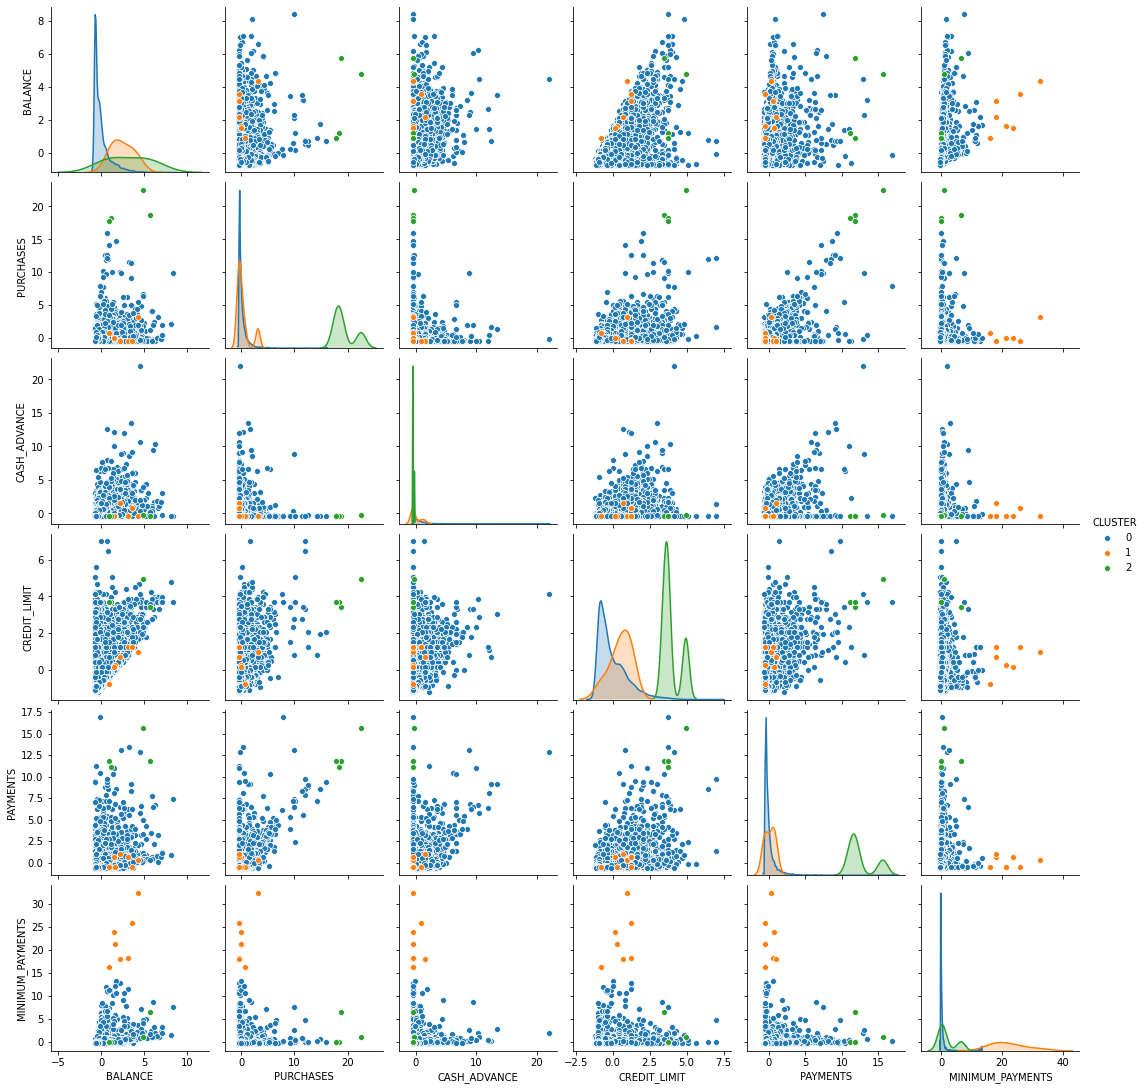

In [26]:

df["CLUSTER"] = model.fit_predict(df[cols].iloc[ :, 1:].values )
cols = ["BALANCE", "PURCHASES", "CASH_ADVANCE","CREDIT_LIMIT", "PAYMENTS", "MINIMUM_PAYMENTS","CLUSTER"]

sns.pairplot( df[ cols ], hue="CLUSTER")

### - Analysis


    # cluster 0 :    
          -Uses their credit card frequently for daily purchases
          -They carry an  above average credit limit. 
          -They don’t use cash advances.

    # cluster 1 :    
          -Uses their credit card frequently for daily purchases
          -They carry an  above average credit limit. 
          -They don’t use cash advances.      

    # cluster 2 :    
          -Uses their credit card frequently for daily purchases
          -They carry an   average credit limit. 
          -They don’t use cash advances.         

### - Dendrogram 

In [ ]:
plt.figure(figsize=(10,8))
dend = shc.dendrogram(shc.linkage(df, method='complete'))
plt.title('Dendrogram')


### 2. KMeans Clustering

### - Model 

In [27]:
inertia=[]
k_range = range(1,6) 

for k in (k_range):
    model = KMeans(n_clusters=k).fit(df)
    inertia.append(model.inertia_)

    

### -The optimal number of clusters(Elbow method)

Text(0, 0.5, 'Inertia')

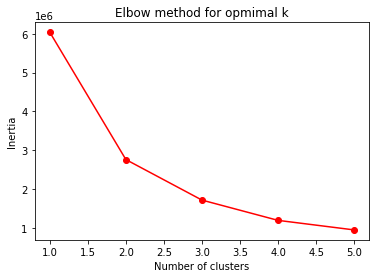

In [28]:
plt.plot(k_range,inertia , 'ro-')
plt.title('Elbow method for opmimal k')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')

The best value of K is 3

### - Cluster plot 

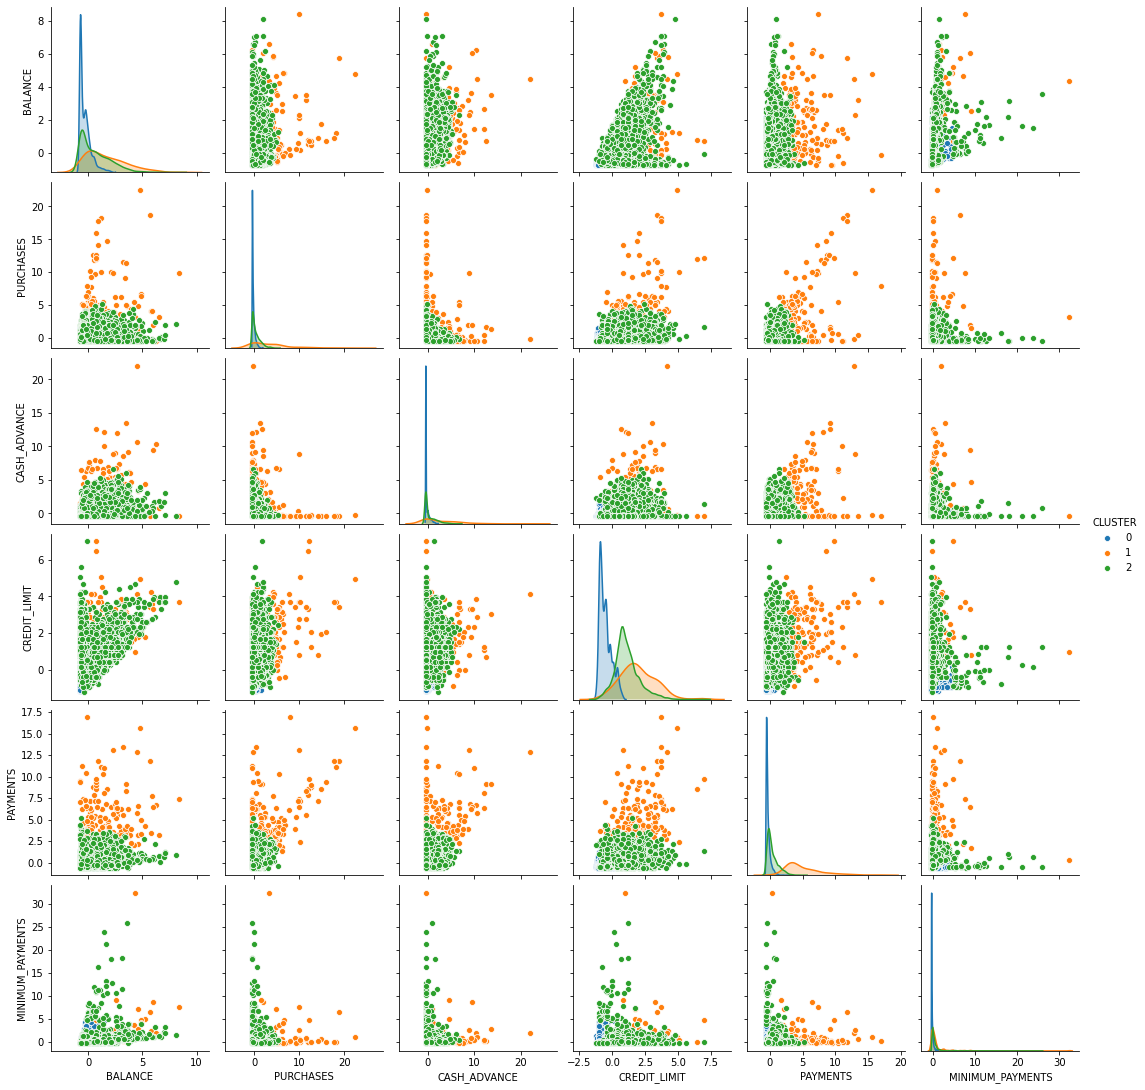

In [30]:

kmeans = KMeans(n_clusters=3) 

df["CLUSTER"] = kmeans.fit_predict(df[cols].iloc[ :, 1:].values )
cols = ["BALANCE", "PURCHASES", "CASH_ADVANCE","CREDIT_LIMIT", "PAYMENTS", "MINIMUM_PAYMENTS",'CLUSTER']


sns.pairplot( df[ cols ], hue="CLUSTER")

### -silhouette_score 

silhouette_score is an another validation metric  to decide the number of clusters to be formulated from the data.

In [75]:
k_range =range(2,6)
silhouette_scores=[]

for k in k_range:
    
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(df)    
  
    cluster_labels = kmeans.labels_
    silhouette_scores.append (silhouette_score(df, cluster_labels))
        

   
    

Text(0, 0.5, 'silhouette score')

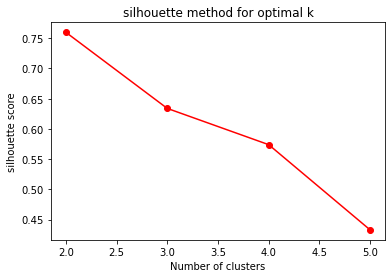

In [76]:
plt.plot(k_range,silhouette_scores , 'ro-')
plt.title('silhouette method for optimal k')
plt.xlabel('Number of clusters')
plt.ylabel('silhouette score')

The score varies between -1 and 1. A value close to 1 implies that the instance is close to its cluster is a part of the right cluster. Whereas, a value close to -1 means that the value is assigned to the wrong cluster 
     - K=2 is the best value


############################## THE END  